##Import librerie

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [2]:
import sys
sys.path.append('./')

from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [3]:
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import initializers
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError

# Used for L2 regularization
from tensorflow.keras import regularizers

# Used for dropout
from tensorflow.keras.layers import Dropout

# Used for early stopping
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.layers import Flatten, Dense

from tensorflow.keras.callbacks import ModelCheckpoint

Connessione al servizio Drive Colab

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Gestione dei Data Set di Training e Test

lettura e stampa del training set

In [5]:
dataset="/content/drive/My Drive/Machine Learning Project/monks/monks-3_train.csv"
df_train = pd.DataFrame(pd.read_csv(dataset))

# Store the number of training patterns
n_TR_patterns = len(df_train.index)
print(f'Numero righe TR: {n_TR_patterns}\n')
df_train.head()

Numero righe TR: 122



,classe,a1,a2,a3,a4,a5,a6
0,1,1,1,1,1,1,2
1,1,1,1,1,1,2,1
2,1,1,1,1,1,2,2
3,0,1,1,1,1,3,1
4,0,1,1,1,1,4,1


In [6]:
# label encoding the data
from sklearn.preprocessing import LabelEncoder
  
le = LabelEncoder()
  
df_train['a1']= le.fit_transform(df_train['a1'])
df_train['a2']= le.fit_transform(df_train['a2'])
df_train['a3']= le.fit_transform(df_train['a3'])
df_train['a4']= le.fit_transform(df_train['a4'])
df_train['a5']= le.fit_transform(df_train['a5'])
df_train['a6']= le.fit_transform(df_train['a6'])

y2 = pd.get_dummies(df_train.a1, prefix='a1')
y3 = pd.get_dummies(df_train.a2, prefix='a2')
y4 = pd.get_dummies(df_train.a3, prefix='a3')
y5 = pd.get_dummies(df_train.a4, prefix='a4')
y6 = pd.get_dummies(df_train.a5, prefix='a5')
y7 = pd.get_dummies(df_train.a6, prefix='a6')

df_train = df_train.drop("a1", axis=1)
df_train = df_train.drop("a2", axis=1)
df_train = df_train.drop("a3", axis=1)
df_train = df_train.drop("a4", axis=1)
df_train = df_train.drop("a5", axis=1)
df_train = df_train.drop("a6", axis=1)


frames = [df_train,y2,y3,y4,y5,y6,y7]

df_train = pd.concat(frames, axis=1, join='inner')
display(df_train)

,classe,a1_0,a1_1,a1_2,a2_0,a2_1,a2_2,a3_0,a3_1,a4_0,a4_1,a4_2,a5_0,a5_1,a5_2,a5_3,a6_0,a6_1
0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1
1,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
2,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1
3,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0
4,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1
118,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1
119,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0
120,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1


lettura e stampa del test set

In [7]:
dataset="/content/drive/My Drive/Machine Learning Project/monks/monks-3_test.csv"
df_test = pd.DataFrame(pd.read_csv(dataset))
df_test.head()

,classe,a1,a2,a3,a4,a5,a6
0,1,1,1,1,1,1,1
1,1,1,1,1,1,1,2
2,1,1,1,1,1,2,1
3,1,1,1,1,1,2,2
4,1,1,1,1,1,3,1


In [8]:
# label encoding the data
from sklearn.preprocessing import LabelEncoder
  
le = LabelEncoder()
  
df_test['a1']= le.fit_transform(df_test['a1'])
df_test['a2']= le.fit_transform(df_test['a2'])
df_test['a3']= le.fit_transform(df_test['a3'])
df_test['a4']= le.fit_transform(df_test['a4'])
df_test['a5']= le.fit_transform(df_test['a5'])
df_test['a6']= le.fit_transform(df_test['a6'])

y2 = pd.get_dummies(df_test.a1, prefix='a1')
y3 = pd.get_dummies(df_test.a2, prefix='a2')
y4 = pd.get_dummies(df_test.a3, prefix='a3')
y5 = pd.get_dummies(df_test.a4, prefix='a4')
y6 = pd.get_dummies(df_test.a5, prefix='a5')
y7 = pd.get_dummies(df_test.a6, prefix='a6')

df_test = df_test.drop("a1", axis=1)
df_test = df_test.drop("a2", axis=1)
df_test = df_test.drop("a3", axis=1)
df_test = df_test.drop("a4", axis=1)
df_test = df_test.drop("a5", axis=1)
df_test = df_test.drop("a6", axis=1)


frames = [df_test,y2,y3,y4,y5,y6,y7]

df_test = pd.concat(frames, axis=1, join='inner')
display(df_test)

,classe,a1_0,a1_1,a1_2,a2_0,a2_1,a2_2,a3_0,a3_1,a4_0,a4_1,a4_2,a5_0,a5_1,a5_2,a5_3,a6_0,a6_1
0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0
1,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1
2,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
3,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1
4,1,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1
428,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0
429,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1
430,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0


divisione in training set e validation set

In [9]:
class_name = 'classe'

attributes = [col for col in df_train.columns if col != class_name]
X = df_train[attributes].values
y = df_train[class_name]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=100, stratify=y)

n_feature = X_train.shape[1]

gestione del test set

In [10]:
attributes = [col for col in df_test.columns if col != class_name]
X_test = df_test[attributes].values
y_test = df_test[class_name]

#Costruzione della Rete Neurale

In [11]:
# Units input layer
units_in = 17
# Units hidden layer
units_hid = 4

definizione del modello: 
- topologia
- optimizer / learning rate

Paper originale Monks disponibile [qui](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.45.2363&rep=rep1&type=pdf) (capitolo 9, inizia da pagina 112 segnata 101).

(Per regularization: nelle slide di teoria si menziona "Over *all* the weights in the network".)

In [12]:
def build_model(reg_value=0, drop_rate=0):

  # Build the model   
  model = Sequential()

  if reg_value != 0 :
    # Apply regularization
    layer_1 = Dense(units_hid, input_dim=n_feature, activation='tanh', 
                    kernel_regularizer=regularizers.l2(reg_value),
                    bias_regularizer=regularizers.l2(reg_value),)
    layer_2 = Dense(units_hid, activation='tanh',
                    kernel_regularizer=regularizers.l2(reg_value),
                    bias_regularizer=regularizers.l2(reg_value),)
    layer_3 = Dense(1, activation='sigmoid')
  else:
    # No regularization
    layer_1 = Dense(units_hid, input_dim=n_feature, activation='tanh')
    layer_2 = Dense(units_hid, activation='tanh')
    layer_3 = Dense(1, activation='sigmoid')

  model.add(layer_1)

  if drop_rate != 0:
    # Add dropout, seed for reproducibility
    model.add(Dropout(drop_rate, seed=123))

  #model.add(layer_2)

  #if drop_rate != 0:
    # Add dropout, seed for reproducibility
    #model.add(Dropout(drop_rate, seed=123))

  model.add(layer_3)
  
  # Compile the model
  model.compile(loss=MeanSquaredError(), 
                #optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.15, nesterov=False, name="SGD"),
                optimizer= tf.keras.optimizers.Adamax(learning_rate=0.01, beta_1=.01, beta_2=0.999, epsilon=1e-07, name='Adamax'), 
                #optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.07,rho=0.9,momentum=0.15,epsilon=1e-07,centered=True,name="RMSprop"), 
                #optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.001, rho=0.95, epsilon=1e-07, name="Adadelta"),
                
                metrics=['accuracy'])
    
  return model

modifica pesi iniziali 

In [13]:
def init_config():
  config_in = [] 
  config_hid = []

  weights_in = np.random.uniform(0, 0.3, size=(units_in,units_hid))
  # weights_in = np.random.rand(units_in,units_hid)
  bias_in = np.random.uniform(0, 0.3, units_hid)
  config_in.append(weights_in)
  config_in.append(bias_in)

  weights_hid = np.random.uniform(0, 0.3, size=(units_hid,1))
  # weights_hid = np.random.rand(units_hid,1)
  bias_hid = np.random.uniform(0, 0.3, 1)
  config_hid.append(weights_hid)
  config_hid.append(bias_hid)

  # config.append(weights_hid)

  return [config_in, config_hid]

Definizione callback per Early Stopping e costruzione modello.

In [14]:
early_val_loss = EarlyStopping(
    monitor="val_loss",
    min_delta=0.01,
    patience=100,
    mode="min",
    restore_best_weights=False,
)

early_val_accuracy = EarlyStopping(
    monitor="val_accuracy",
    patience=50,
    mode="max",
    restore_best_weights=False,
)

model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________


# Multiple Minima

Fitting della rete su training e validation set, per 10 configurazioni di pesi iniziali.

Per i Monks, vista anche la dimensione ridotta del training set, scegliamo la versione batch: questa ci permette di stimare il gradiente in modo più preciso.


In [15]:
def multiple_configs(model, n_configs = 10, n_epochs = 1000, early_stopping = True, dropout = False):
  list_of_config = []
  list_of_history = []

  mean_val_loss = 0
  mean_val_accuracy = 0

  min_val_loss = 100
  confi_min_loss = 0

  max_val_accuracy = 0
  confi_max_accuracy = 0

  # Used to cut off average plots
  min_epochs = n_epochs

  for i in range(n_configs):
    # Ottengo i pesi iniziali
    config = init_config()

    # Assegno i pesi iniziali al modello
    if dropout == True:
      array_in = model.layers[0].set_weights(config[0])
      array_hid = model.layers[2].set_weights(config[1])
    else:
      array_in = model.layers[0].set_weights(config[0])
      array_hid = model.layers[1].set_weights(config[1])

    list_of_config.append(config)
    print('Configurazione numero', i+1, '\n') 

    # Batch version
    # history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs, batch_size=n_TR_patterns, callbacks=[early_val_loss, early_val_accuracy]).history
    if early_stopping:
      history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs, batch_size=n_TR_patterns, callbacks=[early_val_loss]).history

      if early_val_loss.stopped_epoch != 0 and early_val_loss.stopped_epoch < min_epochs:
        min_epochs = early_val_loss.stopped_epoch
    else:
      history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs, batch_size=n_TR_patterns).history

    list_of_history.append(history)
    
    print('\n\nPerformance della configurazione', i+1, 'sul validation set\n')
    val_results = model.evaluate(X_val, y_val, verbose=1)
    print(f'Validation results - Loss: {val_results[0]} - Accuracy: {val_results[1]}%\n\n\n')

    mean_val_loss += val_results[0]
    mean_val_accuracy += val_results[1] 

    if(val_results[0] < min_val_loss):
      min_val_loss = val_results[0]
      confi_min_loss = i 

    if(val_results[1] > max_val_accuracy):
      max_val_accuracy = val_results[1]
      confi_max_accuracy = i 
  
  mean_val_loss = mean_val_loss / n_configs
  mean_val_accuracy = mean_val_accuracy / n_configs

  stats = [mean_val_loss, mean_val_accuracy, min_val_loss, confi_min_loss, max_val_accuracy, confi_max_accuracy, min_epochs]

  return stats, list_of_config, list_of_history

In [16]:
n_configs = 10
stats, list_of_config, list_of_history = multiple_configs(model)

Output streaming troncato alle ultime 5000 righe.



Configurazione numero 2 

Epoch 1/1000
1/1 [==============================] - 0s 55ms/step - loss: 0.2785 - accuracy: 0.4945 - val_loss: 0.2781 - val_accuracy: 0.4839
Epoch 2/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.2741 - accuracy: 0.4945 - val_loss: 0.2739 - val_accuracy: 0.4839
Epoch 3/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.2700 - accuracy: 0.4945 - val_loss: 0.2702 - val_accuracy: 0.4839
Epoch 4/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.2664 - accuracy: 0.4945 - val_loss: 0.2669 - val_accuracy: 0.4839
Epoch 5/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.2631 - accuracy: 0.4945 - val_loss: 0.2640 - val_accuracy: 0.4839
Epoch 6/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.2602 - accuracy: 0.4945 - val_loss: 0.2614 - val_accuracy: 0.4839
Epoch 7/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.

#Analisi dei risultati

In [17]:
print('-- Risultati modello "base" --')
print('Loss media su', n_configs, 'configurazioni:', stats[0])
print('Accuracy media su', n_configs, 'configurazioni:', stats[1], '\n')

print('Loss minima raggiunta:', stats[2])
print('Configurazione corrispondente:', stats[3]+1, '\n') 

print('Accuracy massima raggiunta:', stats[4])
print('Configurazione corrispondente:', stats[5]+1, '\n') 

-- Risultati modello "base" --
Loss media su 10 configurazioni: 0.05388438813388348
Accuracy media su 10 configurazioni: 0.9354838728904724 

Loss minima raggiunta: 0.05146172642707825
Configurazione corrispondente: 1 

Accuracy massima raggiunta: 0.9354838728904724
Configurazione corrispondente: 1 



In [18]:
def plot_best(metric, confi_max, list_of_history):
  plt.plot(list_of_history[confi_max][metric], label='Train', color='blue')
  plt.plot(list_of_history[confi_max]['val_'+metric], label='Val', color='red', linestyle='dashed')

  plt.xlabel('Epochs')
  if metric == 'accuracy':
    plt.ylabel('Accuracy')
  else:
    plt.ylabel('MSE')
    
  plt.title('Monks 3 - Best result')
  plt.legend()
  plt.show()

In [19]:
def plot_average(metric, min_epochs, list_of_history):

  mean_hist = np.array(list_of_history[0][metric][0:min_epochs])
  mean_hist_val = np.array(list_of_history[0]['val_'+metric][0:min_epochs])

  for i in range(1, n_configs):
    mean_hist += np.array(list_of_history[i][metric][0:min_epochs])
    mean_hist_val += np.array(list_of_history[i]['val_'+metric][0:min_epochs])

  plt.plot(np.divide(mean_hist, n_configs), label='Train', color='blue')
  plt.plot(np.divide(mean_hist_val, n_configs), label='Val', color='red', linestyle='dashed')

  plt.xlabel('Epochs')
  if metric == 'accuracy':
    plt.ylabel('Accuracy')
  else:
    plt.ylabel('MSE')

  plt.title('Monks 3 - Average result')
  plt.legend()
  plt.show()

Plot della configurazione migliore.

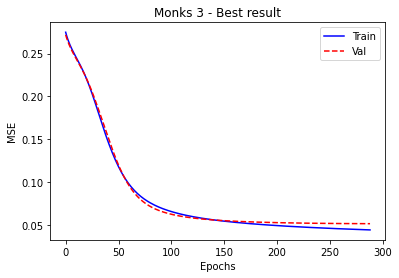

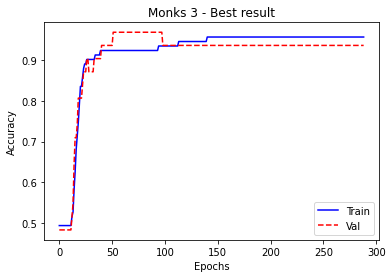

(None, None)

In [20]:
plot_best('loss', stats[3], list_of_history), plot_best('accuracy', stats[5], list_of_history)

Plot dell'andamento medio delle configurazioni.

Il numero di epochs considerate è limitato, si prende come epoch massima quella della configurazione che si è "fermata per prima".

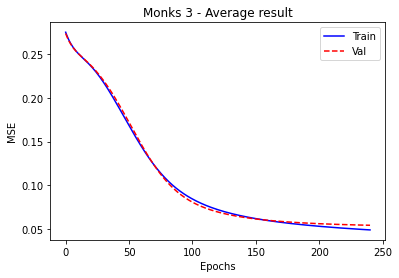

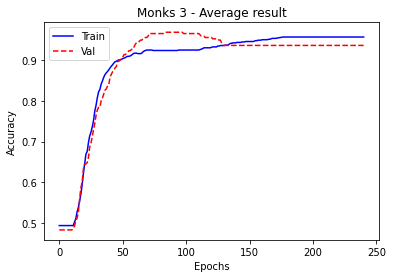

(None, None)

In [21]:
# plot_average('loss'), plot_average('accuracy')
plot_average('loss', stats[6], list_of_history), plot_average('accuracy', stats[6], list_of_history) 

# Confronto con modelli ottimizzati

# L2 Regularization

In [22]:
mc = ModelCheckpoint('/content/drive/My Drive/Machine Learning Project/monks/saved/best_model_L2.h5', monitor='val_loss', save_best_only=True, mode='min', save_freq=100)

# Build a model with L2 regularization
L2_model = build_model(reg_value=0.01)

L2_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________


In [23]:
# h_L2 = L2_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs, batch_size=n_TR_patterns, callbacks=[early_val_loss, early_val_accuracy]).history
# h_L2 = L2_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs, batch_size=n_TR_patterns).history

stats_L2, l_c_L2, l_h_L2 = multiple_configs(L2_model, early_stopping=True)
# stats_L2, l_c_L2, l_h_L2 = multiple_configs(L2_model)

Output streaming troncato alle ultime 5000 righe.
1/1 [==============================] - 0s 37ms/step - loss: 0.1035 - accuracy: 0.9231 - val_loss: 0.1018 - val_accuracy: 0.9677
Epoch 211/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.1033 - accuracy: 0.9231 - val_loss: 0.1017 - val_accuracy: 0.9677
Epoch 212/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.1031 - accuracy: 0.9231 - val_loss: 0.1015 - val_accuracy: 0.9677
Epoch 213/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.1030 - accuracy: 0.9231 - val_loss: 0.1013 - val_accuracy: 0.9677
Epoch 214/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.1028 - accuracy: 0.9231 - val_loss: 0.1012 - val_accuracy: 0.9677
Epoch 215/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.1027 - accuracy: 0.9231 - val_loss: 0.1010 - val_accuracy: 0.9677
Epoch 216/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.1025 - accuracy: 0.9231 - val_

In [24]:
print('-- Risultati modello "regolarizzazione L2" --')
print('Loss media su', n_configs, 'configurazioni:', stats_L2[0])
print('Accuracy media su', n_configs, 'configurazioni:', stats_L2[1], '\n')

print('Loss minima raggiunta:', stats_L2[2])
print('Configurazione corrispondente:', stats_L2[3]+1, '\n') 

print('Accuracy massima raggiunta:', stats_L2[4])
print('Configurazione corrispondente:', stats_L2[5]+1, '\n') 

-- Risultati modello "regolarizzazione L2" --
Loss media su 10 configurazioni: 0.087229435890913
Accuracy media su 10 configurazioni: 0.9645161032676697 

Loss minima raggiunta: 0.0821213647723198
Configurazione corrispondente: 8 

Accuracy massima raggiunta: 0.9677419066429138
Configurazione corrispondente: 1 



Plot della configurazione migliore.

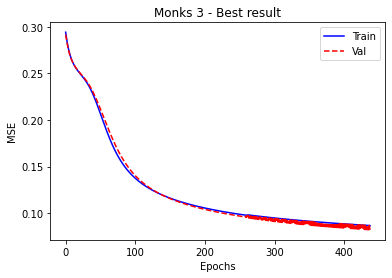

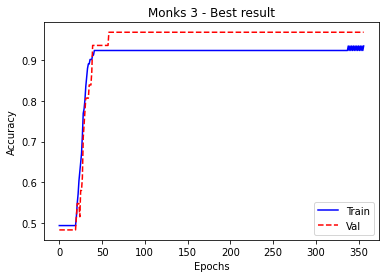

(None, None)

In [25]:
plot_best('loss', stats_L2[3], l_h_L2), plot_best('accuracy', stats_L2[5], l_h_L2)

Plot dell'andamento medio delle configurazioni.

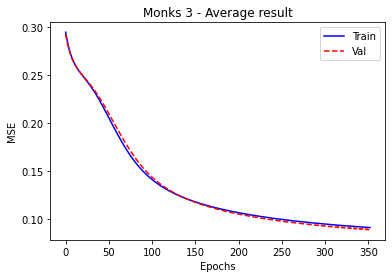

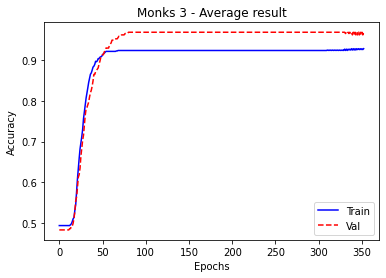

(None, None)

In [26]:
plot_average('loss', stats_L2[6], l_h_L2), plot_average('accuracy', stats_L2[6], l_h_L2) 

# Dropout

In [27]:
mc = ModelCheckpoint('/content/drive/My Drive/Machine Learning Project/monks/saved/best_model_Dropout.h5', monitor='val_loss', save_best_only=True, mode='min', save_freq=100)

# Build a model with L2 regularization and dropout layer(s)
dropout_model = build_model(reg_value=0.01, drop_rate=0.3)

dropout_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 72        
_________________________________________________________________
dropout (Dropout)            (None, 4)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________


In [28]:
# h_dropout = dropout_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs, batch_size=n_TR_patterns, callbacks=[early_val_loss, early_val_accuracy]).history
# h_dropout = dropout_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs, batch_size=n_TR_patterns).history

stats_dropout, l_c_dropout, l_h_dropout = multiple_configs(dropout_model, early_stopping=True, dropout=True)

Output streaming troncato alle ultime 5000 righe.
Epoch 170/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.1299 - accuracy: 0.9231 - val_loss: 0.1241 - val_accuracy: 0.9677
Epoch 171/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.1187 - accuracy: 0.9231 - val_loss: 0.1238 - val_accuracy: 0.9677
Epoch 172/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.1256 - accuracy: 0.9121 - val_loss: 0.1232 - val_accuracy: 0.9677
Epoch 173/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.1329 - accuracy: 0.9011 - val_loss: 0.1227 - val_accuracy: 0.9677
Epoch 174/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.1242 - accuracy: 0.9121 - val_loss: 0.1225 - val_accuracy: 0.9677
Epoch 175/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.1341 - accuracy: 0.9011 - val_loss: 0.1221 - val_accuracy: 0.9677
Epoch 176/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.1360 - accuracy

In [29]:
print('-- Risultati modello "regolarizzazione L2 + dropout" --')
print('Loss media su', n_configs, 'configurazioni:', stats_L2[0])
print('Accuracy media su', n_configs, 'configurazioni:', stats_L2[1], '\n')

print('Loss minima raggiunta:', stats_L2[2])
print('Configurazione corrispondente:', stats_L2[3]+1, '\n') 

print('Accuracy massima raggiunta:', stats_L2[4])
print('Configurazione corrispondente:', stats_L2[5]+1, '\n')

-- Risultati modello "regolarizzazione L2 + dropout" --
Loss media su 10 configurazioni: 0.087229435890913
Accuracy media su 10 configurazioni: 0.9645161032676697 

Loss minima raggiunta: 0.0821213647723198
Configurazione corrispondente: 8 

Accuracy massima raggiunta: 0.9677419066429138
Configurazione corrispondente: 1 



Plot della configurazione migliore.

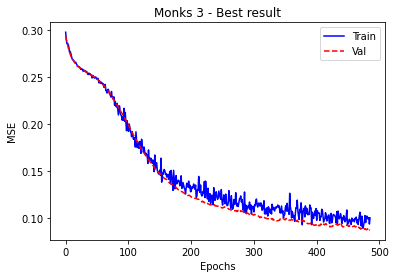

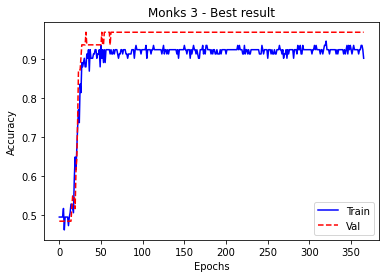

(None, None)

In [30]:
# plot_best('loss'), plot_best('accuracy')
plot_best('loss', stats_dropout[3], l_h_dropout), plot_best('accuracy', stats_dropout[5], l_h_dropout)

Plot dell'andamento medio delle configurazioni.

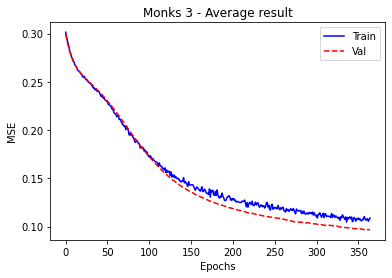

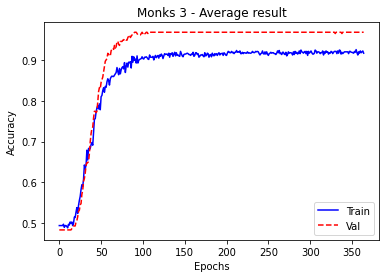

(None, None)

In [31]:
plot_average('loss', stats_dropout[6], l_h_dropout), plot_average('accuracy', stats_dropout[6], l_h_dropout) 

# Esecuzione sul test set

In [32]:
# Test the basic model
test_results = model.evaluate(X_test, y_test, verbose=0)
print(f'Test results, basic model \n Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

Test results, basic model 
 Loss: 0.053690120577812195 - Accuracy: 0.9421296119689941%


In [33]:
# Test the model with L2 regularization
test_results = L2_model.evaluate(X_test, y_test, verbose=0)
print(f'Test results, model with L2 regularization \n Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

Test results, model with L2 regularization 
 Loss: 0.08736733347177505 - Accuracy: 0.9675925970077515%


In [34]:
# Test the model with L2 regularization and dropout
test_results = dropout_model.evaluate(X_test, y_test, verbose=0)
print(f'Test results, model with L2 regularization and dropout \n Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

Test results, model with L2 regularization and dropout 
 Loss: 0.0848643109202385 - Accuracy: 0.9652777910232544%
